## Fire Perimeter

This project can be found at [https://github.com/stephenccodes/eds220-hwk4](https://github.com/stephenccodes/eds220-hwk4)

## About the data:

### California Fire Perimeters
This database contains information about spatial distribution of historic wild and prescribed fires in the state of California. The data comes with a warning that it is not comprehensive, with some records lost or damaged, fire perimeters may be missing. There may also be  duplicate fires and  over-generalizatoin of fire perimeters. The database is maintained by the California Department of Forestry and Fire Protection’s Fire and Resource Assessment Program. 

Date accessed: 11/19/24

[https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436](https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436)

###  Landsat Collection 2 Level-2

 This data is a simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite.
The data was retrieved from the Microsof Planetary Computer data catalogue and pre-processed to remove data outside land and coarsen the spatial resolution.

Date accessed: 11/19/24

Original dats source:

[https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)

In [24]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import matplotlib.pyplot as plt

# Make a file path for the landsat data
fp = os.path.join('/courses/EDS220/data/hwk4_landsat_data/landsat8-2018-01-26-sb-simplified.nc')

# Read in the landsat data
landsat = rioxr.open_rasterio(fp)

# Explore the data
landsat.head(3)

<xarray.Dataset> Size: 424B
Dimensions:      (band: 1, x: 3, y: 3)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 24B 1.213e+05 1.216e+05 1.218e+05
  * y            (y) float64 24B 3.952e+06 3.952e+06 3.952e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 72B ...
    green        (band, y, x) float64 72B ...
    blue         (band, y, x) float64 72B ...
    nir08        (band, y, x) float64 72B ...
    swir22       (band, y, x) float64 72B ...

In [2]:
# Show the working directory
os.getcwd() 

'/Users/scarroll/MEDS/EDS-220/eds220-hwk4'

In [5]:
# Define the file path using os.path
fp_fire_p = os.path.join('data/ca_fire_perimeter/California_Fire_Perimeters_(all).shp')

In [ ]:
# Read in the fire perimeter data
ca_fire_p = gpd.read_file(fp_fire_p)

# Simplify the column names
ca_fire_p.columns = ca_fire_p.columns.str.lower() 

In [12]:
# Explore the data
ca_fire_p.head(3)

,year_,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,cause,c_method,objective,gis_acres,comments,complex_na,irwinid,fire_num,complex_id,decades,geometry
0,2023,CA,CDF,SKU,WHITWORTH,00004808,2023-06-17,2023-06-17,5,1,1,5.72913,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},None,None,2020,"POLYGON ((-13682443.000 5091132.739, -13682445..."
1,2023,CA,LRA,BTU,KAISER,00010225,2023-06-02,2023-06-02,5,1,1,13.60240,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},None,None,2020,"POLYGON ((-13576727.142 4841226.161, -13576726..."
2,2023,CA,CDF,AEU,JACKSON,00017640,2023-07-01,2023-07-02,2,1,1,27.81450,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},None,None,2020,"POLYGON ((-13459243.000 4621236.000, -13458968..."


In [13]:
# Find the dmiensions of the data
ca_fire_p.shape

(22261, 19)

In [14]:
# Find the CRS of the data
ca_fire_p.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
# Check the data types
ca_fire_p.dtypes

year_            int64
state           object
agency          object
unit_id         object
fire_name       object
inc_num         object
alarm_date      object
cont_date       object
cause            int64
c_method         int64
objective        int64
gis_acres      float64
comments        object
complex_na      object
irwinid         object
fire_num        object
complex_id      object
decades          int64
geometry      geometry
dtype: object

In [16]:
# Check to see how many NA values are in each column
ca_fire_p.isna().sum()

year_             0
state             0
agency           53
unit_id          67
fire_name      6589
inc_num         975
alarm_date        0
cont_date         0
cause             0
c_method          0
objective         0
gis_acres         0
comments      19554
complex_na    21665
irwinid       19566
fire_num       5114
complex_id    21901
decades           0
geometry          0
dtype: int64

In [22]:
# Find the range of years for the data
print(ca_fire_p.year_.max())
print(ca_fire_p.year_.min())

2023
0


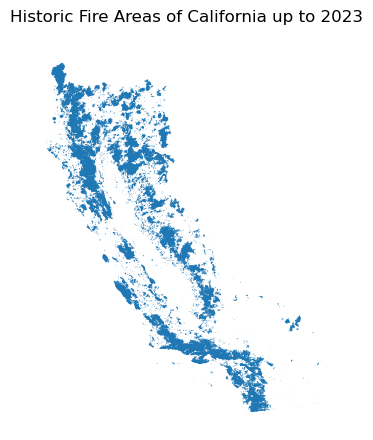

In [26]:
# Plot the data
fig, ax = plt.subplots(figsize = (9, 5))
ax.axis('off') # Remove axes for cleaner map
ca_fire_p.plot(ax = ax)
plt.title("Historic Fire Areas of California up to 2023")
plt.show()

In [27]:
ca_fire_p.head(3)

,year_,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,cause,c_method,objective,gis_acres,comments,complex_na,irwinid,fire_num,complex_id,decades,geometry
0,2023,CA,CDF,SKU,WHITWORTH,00004808,2023-06-17,2023-06-17,5,1,1,5.72913,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},None,None,2020,"POLYGON ((-13682443.000 5091132.739, -13682445..."
1,2023,CA,LRA,BTU,KAISER,00010225,2023-06-02,2023-06-02,5,1,1,13.60240,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},None,None,2020,"POLYGON ((-13576727.142 4841226.161, -13576726..."
2,2023,CA,CDF,AEU,JACKSON,00017640,2023-07-01,2023-07-02,2,1,1,27.81450,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},None,None,2020,"POLYGON ((-13459243.000 4621236.000, -13458968..."


In [28]:
# Filter data to the 2017 Thomas fire
thomas_fire = ca_fire_p.loc[(ca_fire_p['year_'] == 2017) & (ca_fire_p['fire_name'] == 'THOMAS')]
thomas_fire.head(3)

,year_,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,cause,c_method,objective,gis_acres,comments,complex_na,irwinid,fire_num,complex_id,decades,geometry
2654,2017,CA,USF,VNC,THOMAS,00003583,2017-12-04,2018-01-12,9,7,1,281791.0,CONT_DATE based on Inciweb,None,None,None,None,2010,"MULTIPOLYGON (((-13316089.016 4088553.040, -13..."


In [31]:
# Save the Thomas fire subset to a file in 'data' folder
thomas_fire.to_file('data/thomas_fire/thomas_fire.shp')